In [15]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import AnovaRM
import pingouin as pg
from tqdm.notebook import tqdm
from analysis_module import *

In [2]:
fix_analyse = Fixation('s64', show = False)
trial_x, trial_y = fix_analyse.parse_trials(pred_path.FAZE,1, "poly_x_3", "poly_y_3", show = True)
get_fix_acc(fix_analyse.gt_points, trial_x, trial_y)

s64 adding nan to pt 13 trial 12


591.5505890941644

In [17]:
paths = glob.glob(pred_path.ETH.value+'s*/calib_test1/outputs') #all subjects where calib models are available : 64 - 1 (s46) = 63 total
subjects = [p.split("/")[-3] for p in paths]

In [18]:
len(subjects)

41

## Calib Test 1

In [106]:
## Create dfs
# ct1_mpii = consolidate_1(subjects, pred_path.MPII, save = True) 
# ct1_eth = consolidate_1(subjects, pred_path.ETH, save = True)
# ct1_faze = consolidate_1(subjects, pred_path.FAZE, save = True)

## Loaf dfs
ct1_mpii = pd.read_csv("calib_tests_df/mpii_ct1.csv")
ct1_eth = pd.read_csv("calib_tests_df/eth_ct1.csv")
ct1_faze = pd.read_csv("calib_tests_df/faze_ct1.csv")

ct1_mpii = ct1_mpii[ct1_mpii["subject"].isin(subjects)].reset_index(drop=True)
ct1_eth = ct1_eth[ct1_eth["subject"].isin(subjects)].reset_index(drop=True)
ct1_faze = ct1_faze[ct1_faze["subject"].isin(subjects)].reset_index(drop=True)

In [ ]:
ct1_faze.sort_values('acc',ascending = False)[:10]
# subjects = ["s62","s64","s74", "s59"] have really bad acc

,subject,factor,acc
81,s64,Beg,637.855327
82,s64,Beg+Mid,607.329495
83,s64,Beg+Mid+End,591.550589
87,s74,Beg,547.785961
174,s62,Beg,530.099720
36,s22,Beg,510.968449
160,s10,Beg+Mid,503.220912
176,s62,Beg+Mid+End,502.892122
89,s74,Beg+Mid+End,498.237996
175,s62,Beg+Mid,497.085178


In [34]:
def ct1_run_tests(ct1_df, in_vis_deg = False, exclude_low_fps = False, pal = sns.color_palette('deep', 3)):
    ct1_df = ct1_df.copy()
    if in_vis_deg: 
        ct1_df["acc_deg"] = ct1_df.acc/54.05
        target = 'acc_deg'
    else: target = 'acc'
    
    if exclude_low_fps:
        ct1_df = ct1_df[~ct1_df.subject.isin(low_fps_subb)]
    
    print(ct1_df.groupby("factor")[target].agg(['count', 'max', 'mean', 'min', 'std']))
    print(AnovaRM(data=ct1_df, depvar='acc', subject='subject', within=['factor']).fit()) #depvar for ANOVA is acc not acc_deg
    sns.set(rc={'figure.figsize':(16,12)})
    sns.boxplot(x="factor", y=target, data = ct1_df, color=pal[2], showfliers = False)
    sns.swarmplot(x="factor", y=target, data = ct1_df, color = pal[0])
#     sns.swarmplot(x="factor", y=target, data = ct1_df[~ct1_df.subject.isin(low_fps_subb)], color = pal[0])
#     if not exclude_low_fps: 
#         sns.swarmplot(x="factor", y=target, data = ct1_df[ct1_df.subject.isin(low_fps_subb)], color = pal[1], marker = '<')
    plt.show()

             count        max      mean       min       std
factor                                                     
Beg             41  12.009659  4.350161  2.105215  1.861463
Beg+Mid         41  11.349803  3.962896  1.939944  1.703944
Beg+Mid+End     41  11.230361  3.839388  1.964759  1.693411
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
factor 16.1194 2.0000 80.0000 0.0000



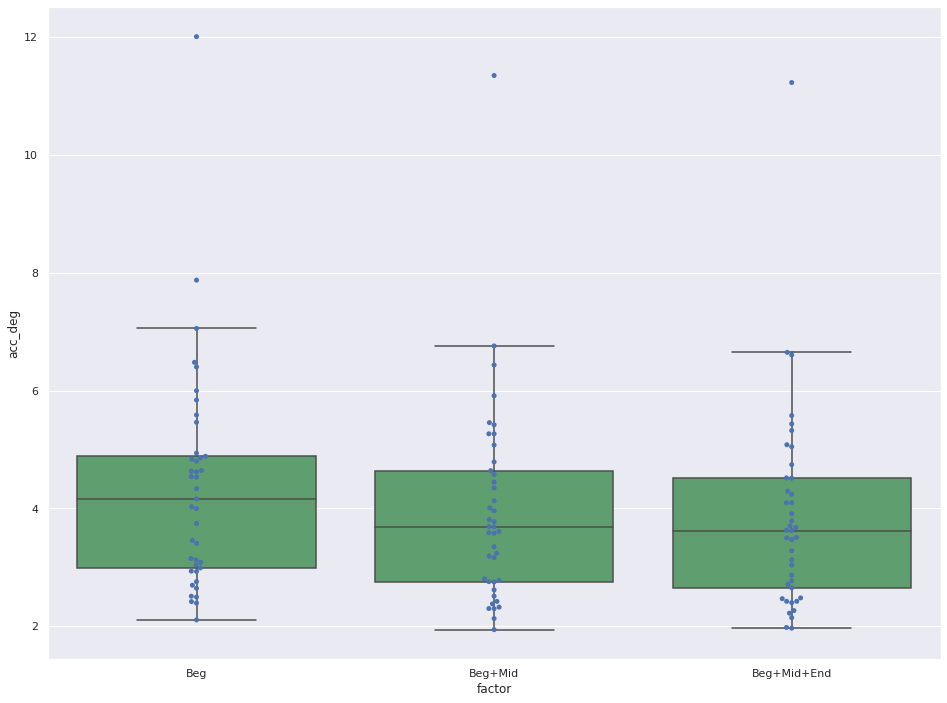

             count        max      mean       min       std
factor                                                     
Beg             41  40.354146  5.231883  1.266801  6.395666
Beg+Mid         41  43.829988  4.838500  1.199062  6.881396
Beg+Mid+End     41  42.261586  4.717090  1.238458  6.746209
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
factor  4.4632 2.0000 80.0000 0.0145



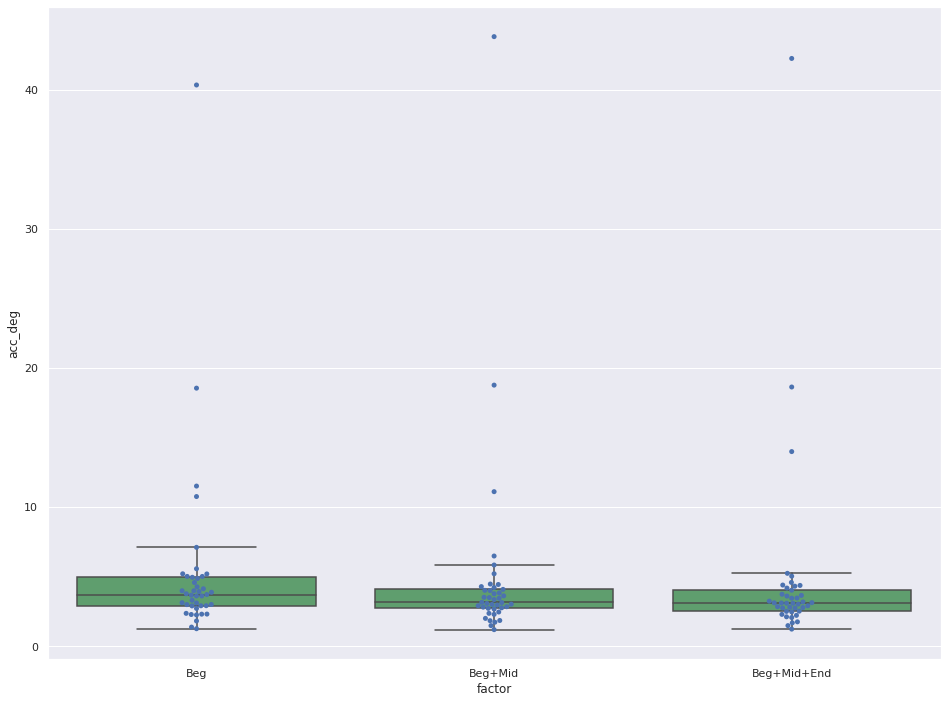

             count        max      mean       min       std
factor                                                     
Beg             41  11.801209  3.650963  1.273206  1.865033
Beg+Mid         41  11.236438  2.969861  1.219305  1.608345
Beg+Mid+End     41  10.944507  2.782524  1.484853  1.548292
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
factor 35.6254 2.0000 80.0000 0.0000



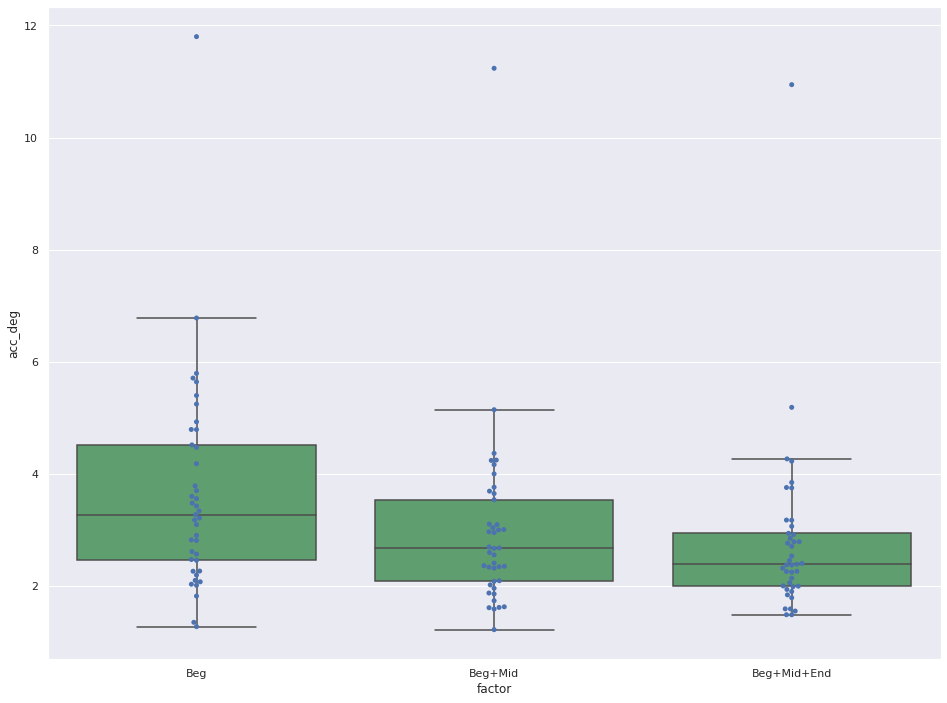

In [35]:
#ALL SUBJECTS
pal = sns.color_palette('colorblind',3)

ct1_run_tests(ct1_mpii, in_vis_deg=True)
ct1_run_tests(ct1_eth, in_vis_deg=True)
ct1_run_tests(ct1_faze, in_vis_deg=True)

(0.0, 10.0)

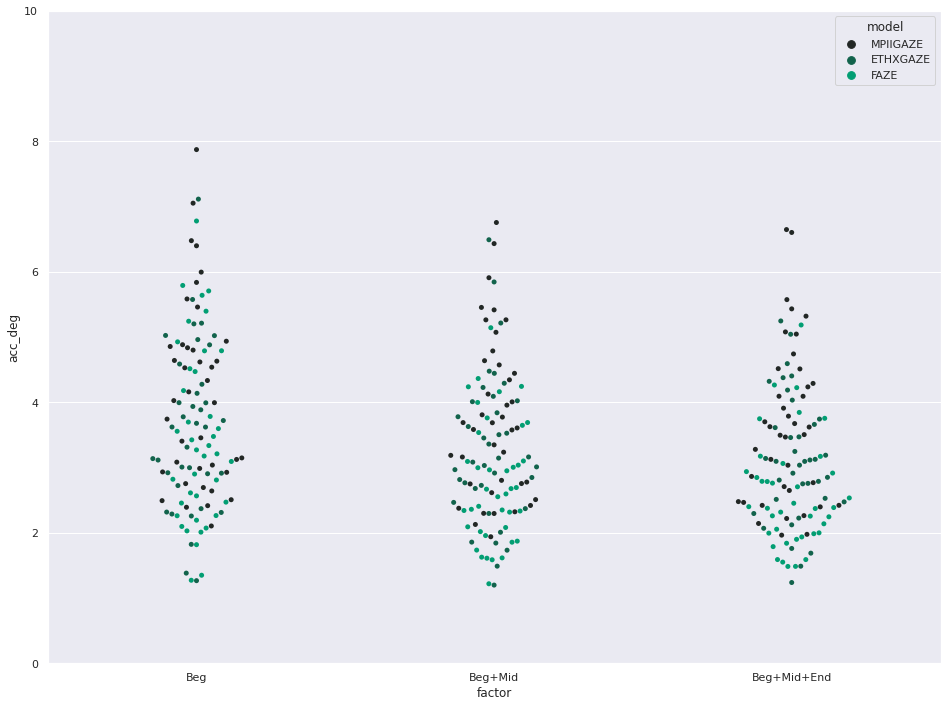

In [65]:
sns.swarmplot(x="factor", y="acc_deg", hue="model", data = temp, color = pal[2])
plt.ylim([0,10])

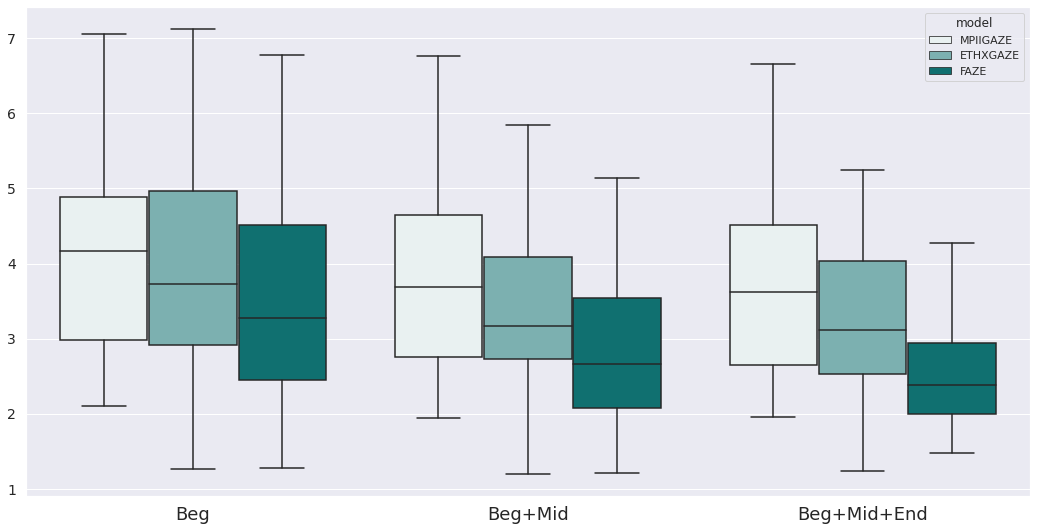

In [90]:
plt.figure(figsize=(18,9))
ct1_mpii["model"] = "MPIIGAZE"
ct1_eth["model"] = "ETHXGAZE"
ct1_faze["model"] = "FAZE"
temp = pd.concat([ct1_mpii, ct1_eth, ct1_faze])
temp["acc_deg"] = temp.acc/54.05
sns.boxplot(x="factor", y="acc_deg", hue="model", data = temp, color="teal", showfliers = False)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 14)
plt.xlabel('')
plt.ylabel('')
plt.savefig("calib1_etra.svg")
# sns.swarmplot(x="factor", y="acc_deg", hue="model", data = temp, color = pal[0])
# plt.ylim([0,10])

In [125]:
mpii = ct1_mpii[["subject","acc"]].groupby("subject").mean()
eth = ct1_eth[["subject","acc"]].groupby("subject").mean()
faze = ct1_faze[["subject","acc"]].groupby("subject").mean()

mpii["model"] = "MPII"; eth["model"] = "ETHXGaze"; faze["model"] = "FAZE" 
avg_models = mpii.append(eth).append(faze).sort_values("subject")
print(pg.pairwise_ttests(dv='acc', within='model', subject='subject', padjust='bonf', data = avg_models).to_markdown())

|    | Contrast   | A        | B    | Paired   | Parametric   |         T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |       BF10 |    hedges |
|---:|:-----------|:---------|:-----|:---------|:-------------|----------:|------:|:--------------|------------:|------------:|:-----------|-----------:|----------:|
|  0 | model      | ETHXGaze | FAZE | True     | True         |  1.83297  |    40 | two-sided     | 0.0742577   | 0.222773    | bonf       |      0.774 |  0.367494 |
|  1 | model      | ETHXGaze | MPII | True     | True         |  0.897173 |    40 | two-sided     | 0.374995    | 1           | bonf       |      0.246 |  0.179285 |
|  2 | model      | FAZE     | MPII | True     | True         | -6.35786  |    40 | two-sided     | 1.48429e-07 | 4.45287e-07 | bonf       | 101100     | -0.541575 |


In [129]:
avg_samples = ct1_mpii.append(ct1_eth).append(ct1_faze)

avg_samples = avg_samples.groupby(["subject","factor"]).mean().reset_index()

print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = avg_samples).to_markdown())

|    | Contrast   | A       | B           | Paired   | Parametric   |       T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |     BF10 |   hedges |
|---:|:-----------|:--------|:------------|:---------|:-------------|--------:|------:|:--------------|------------:|------------:|:-----------|---------:|---------:|
|  0 | factor     | Beg     | Beg+Mid     | True     | True         | 4.89357 |    40 | two-sided     | 1.66111e-05 | 4.98332e-05 | bonf       | 1251.87  | 0.171594 |
|  1 | factor     | Beg     | Beg+Mid+End | True     | True         | 5.40132 |    40 | two-sided     | 3.2716e-06  | 9.81479e-06 | bonf       | 5626.74  | 0.223723 |
|  2 | factor     | Beg+Mid | Beg+Mid+End | True     | True         | 2.50276 |    40 | two-sided     | 0.0165092   | 0.0495277   | bonf       |    2.641 | 0.050713 |


In [113]:
import pingouin as pg
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct1_mpii).to_markdown())
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct1_eth).to_markdown())
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct1_faze).to_markdown())

|    | Contrast   | A       | B           | Paired   | Parametric   |       T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |    BF10 |    hedges |
|---:|:-----------|:--------|:------------|:---------|:-------------|--------:|------:|:--------------|------------:|------------:|:-----------|--------:|----------:|
|  0 | factor     | Beg     | Beg+Mid     | True     | True         | 3.5424  |    40 | two-sided     | 0.00102498  | 0.00307495  | bonf       |  29.647 | 0.214982  |
|  1 | factor     | Beg     | Beg+Mid+End | True     | True         | 4.5003  |    40 | two-sided     | 5.72907e-05 | 0.000171872 | bonf       | 401.798 | 0.284345  |
|  2 | factor     | Beg+Mid | Beg+Mid+End | True     | True         | 3.08585 |    40 | two-sided     | 0.00367527  | 0.0110258   | bonf       |   9.604 | 0.0720245 |
|    | Contrast   | A       | B           | Paired   | Parametric   |        T |   dof | alternative   |     p-unc |    p-corr | p-adjust   |   BF10 |    hedges |
|-

In [110]:
ct1_comb = pd.merge(ct1_mpii,ct1_eth, on = ["subject", "factor"]).merge(ct1_faze, on = ["subject", "factor"])
ct1_comb = ct1_comb.set_index(["subject","factor"]).stack().reset_index()
ct1_comb.columns = ["subject","factor_sample","factor_model","acc"]
ct1_comb["factor_model"].replace({"acc_x": "mpii", "acc_y":"eth", "acc":"faze"}, inplace = True)
ct1_comb

,subject,factor_sample,factor_model,acc
0,s27,Beg,mpii,184.076322
1,s27,Beg,eth,169.602206
2,s27,Beg,faze,156.816122
3,s27,Beg+Mid,mpii,193.345126
4,s27,Beg+Mid,eth,157.663264
...,...,...,...,...
364,s43,Beg+Mid,eth,2369.010830
365,s43,Beg+Mid,faze,138.020491
366,s43,Beg+Mid+End,mpii,200.111938
367,s43,Beg+Mid+End,eth,2284.238746


In [ ]:
# ct1_comb old data not for ETRA
print(AnovaRM(data=ct1_comb, depvar='acc', subject='subject', within=['factor_sample', 'factor_model']).fit())

                          Anova
                           F Value Num DF  Den DF  Pr > F
---------------------------------------------------------
factor_sample              19.0767 2.0000 124.0000 0.0000
factor_model                3.1826 2.0000 124.0000 0.0449
factor_sample:factor_model  1.3832 4.0000 248.0000 0.2403



In [111]:
from pingouin import rm_anova
rm_anova(data=ct1_comb, dv = 'acc', within = ['factor_sample', 'factor_model'], subject='subject', detailed = True, effsize = 'n2')

/home/shreshth.saxena/.conda/envs/temp/lib/python3.9/site-packages/pingouin/distribution.py:459: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn("Epsilon values might be innaccurate in "


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,n2,eps
0,factor_sample,78664.655282,2,80,39332.327641,24.423265,5.256423e-09,7.308177e-07,0.007711,0.687057
1,factor_model,578787.641334,2,80,289393.820667,2.493484,8.902381e-02,1.211244e-01,0.056734,0.516338
2,factor_sample * factor_model,5730.569063,4,160,1432.642266,1.833291,1.249736e-01,1.896684e-01,0.000562,0.135676


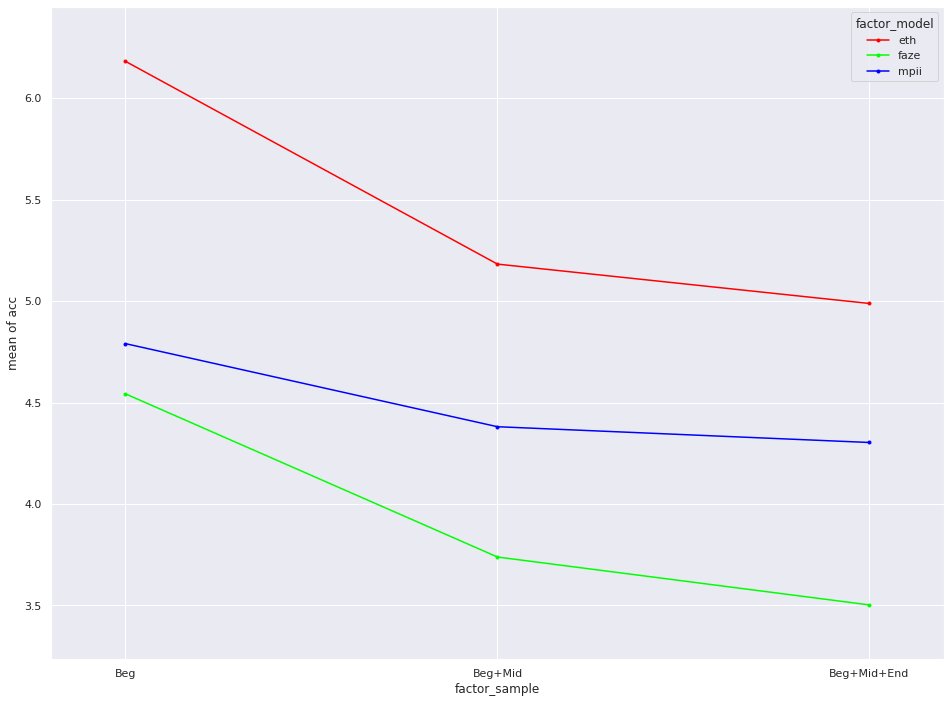

In [13]:
from statsmodels.graphics.factorplots import interaction_plot
# ct1_comb["acc_v"] = ct1_comb['acc']/54.05
interaction_plot(ct1_comb["factor_sample"], ct1_comb["factor_model"], ct1_comb["acc"]/54.05)
plt.show()

## Calib Test 2

In [133]:
## Create Dfs
# ct2_mpii = consolidate_2(subjects, pred_path.MPII) 
# ct2_eth = consolidate_2(subjects, pred_path.ETH)
# ct2_faze = consolidate_2(subjects, pred_path.FAZE)

## Load Dfs
ct2_mpii = pd.read_csv("calib_tests_df/mpii_ct2.csv")
ct2_eth = pd.read_csv("calib_tests_df/eth_ct2.csv")
ct2_faze = pd.read_csv("calib_tests_df/faze_ct2.csv")

ct2_mpii = ct2_mpii[ct2_mpii["subject"].isin(subjects)].reset_index(drop=True)
ct2_eth = ct2_eth[ct2_eth["subject"].isin(subjects)].reset_index(drop=True)
ct2_faze = ct2_faze[ct2_faze["subject"].isin(subjects)].reset_index(drop=True)

Text(0, 0.5, '')

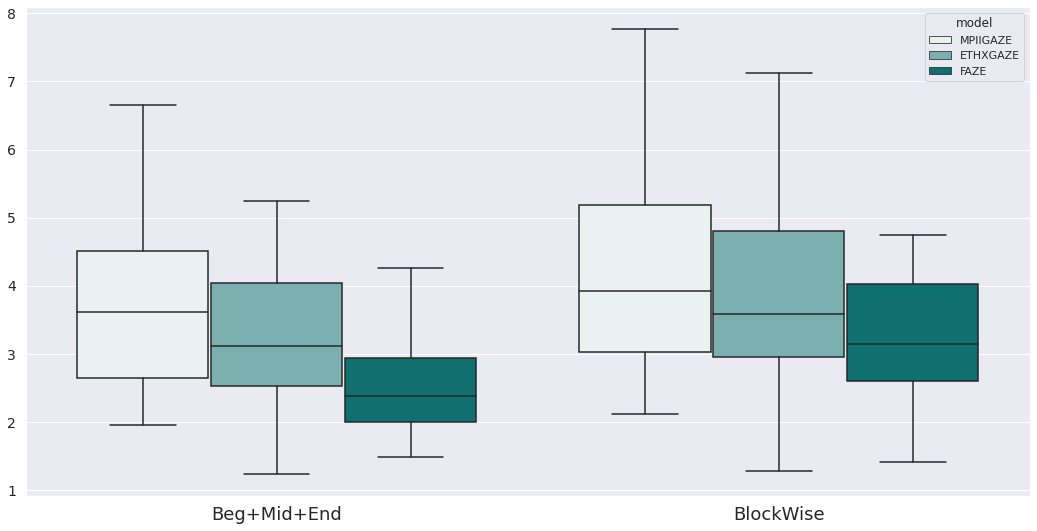

In [132]:
plt.figure(figsize=(18,9))
ct2_mpii["model"] = "MPIIGAZE"
ct2_eth["model"] = "ETHXGAZE"
ct2_faze["model"] = "FAZE"
temp = pd.concat([ct2_mpii, ct2_eth, ct2_faze])
temp["acc_deg"] = temp.acc/54.05
sns.boxplot(x="factor", y="acc_deg", hue="model", data = temp, color="teal", showfliers = False)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 14)
plt.xlabel('')
plt.ylabel('')
# plt.savefig("calib2_etra.png")

In [139]:
ct2_mpii[["subject","acc"]].groupby("subject").mean().shape

(41, 1)

In [153]:
ct2_comb = pd.merge(ct2_mpii,ct2_eth, on = ["subject", "factor"]).merge(ct2_faze, on = ["subject", "factor"])
ct2_comb = ct2_comb.set_index(["subject","factor"]).stack().reset_index()
# ct2_comb.columns = ["subject","factor_sample","factor_model","acc"]
# ct2_comb["factor_model"].replace({"acc_x": "mpii", "acc_y":"eth", "acc":"faze"}, inplace = True)
ct2_comb

,subject,factor,level_2,0
0,s27,Beg+Mid+End,Unnamed: 0_x,2.000000
1,s27,Beg+Mid+End,acc_x,198.640093
2,s27,Beg+Mid+End,Unnamed: 0_y,2.000000
3,s27,Beg+Mid+End,acc_y,150.750461
4,s27,Beg+Mid+End,Unnamed: 0,2.000000
...,...,...,...,...
487,s43,BlockWise,acc_x,223.546857
488,s43,BlockWise,Unnamed: 0_y,125.000000
489,s43,BlockWise,acc_y,2550.462778
490,s43,BlockWise,Unnamed: 0,125.000000


In [140]:
mpii = ct2_mpii[["subject","acc"]].groupby("subject").mean()
eth = ct2_eth[["subject","acc"]].groupby("subject").mean()
faze = ct2_faze[["subject","acc"]].groupby("subject").mean()

mpii["model"] = "MPII"; eth["model"] = "ETHXGaze"; faze["model"] = "FAZE" 
avg_models = mpii.append(eth).append(faze).sort_values("subject")
print(pg.pairwise_ttests(dv='acc', within='model', subject='subject', padjust='bonf', data = avg_models).to_markdown())

|    | Contrast   | A        | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |       BF10 |    hedges |
|---:|:-----------|:---------|:-----|:---------|:-------------|---------:|------:|:--------------|------------:|------------:|:-----------|-----------:|----------:|
|  0 | model      | ETHXGaze | FAZE | True     | True         |  1.83339 |    40 | two-sided     | 0.0741942   | 0.222583    | bonf       |      0.774 |  0.371867 |
|  1 | model      | ETHXGaze | MPII | True     | True         |  0.8932  |    40 | two-sided     | 0.377093    | 1           | bonf       |      0.245 |  0.180845 |
|  2 | model      | FAZE     | MPII | True     | True         | -6.5497  |    40 | two-sided     | 7.98607e-08 | 2.39582e-07 | bonf       | 180900     | -0.570021 |


In [141]:
avg_samples = ct2_mpii.append(ct2_eth).append(ct2_faze)

avg_samples = avg_samples.groupby(["subject","factor"]).mean().reset_index()

print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = avg_samples).to_markdown())

|    | Contrast   | A           | B         | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      BF10 |    hedges |
|---:|:-----------|:------------|:----------|:---------|:-------------|---------:|------:|:--------------|------------:|----------:|----------:|
|  0 | factor     | Beg+Mid+End | BlockWise | True     | True         | -7.58578 |    40 | two-sided     | 2.90441e-09 | 4.134e+06 | -0.228881 |


In [59]:
def ct2_run_tests(ct2_df, in_vis_deg = False, exclude_low_fps = False, pal = sns.color_palette('deep', 3)):
    ct2_df = ct2_df.copy()
    if in_vis_deg: 
        ct2_df["acc_deg"] = ct2_df.acc/54.05
        target = 'acc_deg'
    else: target = 'acc'
    
    if exclude_low_fps:
        ct2_df = ct2_df[~ct2_df.subject.isin(low_fps_subb)]
    
    print(ct2_df.groupby("factor")[target].agg(['count', 'max', 'mean', 'min', 'std']) , f"\n {'-'*122}")
#     print(AnovaRM(data=ct2_df, depvar='acc', subject='subject', within=['factor']).fit()) #depvar for ANOVA is acc not acc_deg
    print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct2_df).to_markdown(index=False), "\n")
    sns.set(rc={'figure.figsize':(16,12)})
    sns.boxplot(x="factor", y=target, data = ct2_df, color=pal[2], showfliers = False)
    sns.swarmplot(x="factor", y=target, data = ct2_df[~ct2_df.subject.isin(low_fps_subb)], color = pal[0])
    if not exclude_low_fps: sns.swarmplot(x="factor", y=target, data = ct2_df[ct2_df.subject.isin(low_fps_subb)], color = pal[1], marker = '<')
    plt.show()

             count        max      mean       min       std
factor                                                     
Beg+Mid+End     63  11.230361  4.303127  1.964759  1.855452
BlockWise       63  11.916394  4.867525  2.117472  2.024429 
 --------------------------------------------------------------------------------------------------------------------------
| Contrast   | A           | B         | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |     BF10 |   hedges |
|:-----------|:------------|:----------|:---------|:-------------|---------:|------:|:--------------|------------:|---------:|---------:|
| factor     | Beg+Mid+End | BlockWise | True     | True         | -7.02725 |    61 | two-sided     | 2.08041e-09 | 5.44e+06 | -0.28495 | 



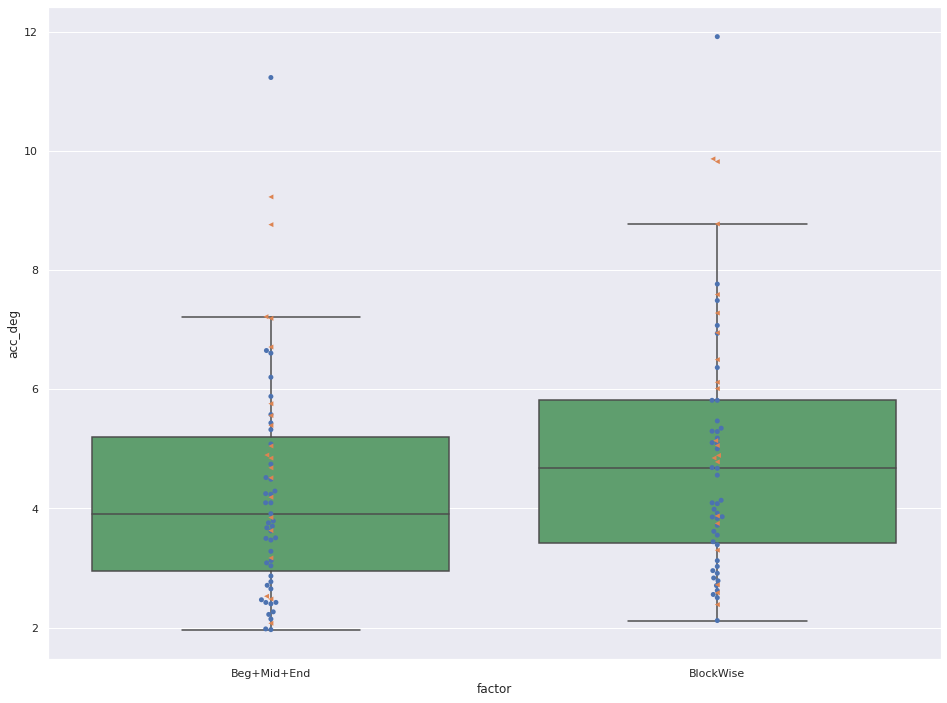

             count        max      mean       min       std
factor                                                     
Beg+Mid+End     63  42.261586  4.988422  1.238458  5.949823
BlockWise       63  47.187100  6.470453  1.276047  9.044006 
 --------------------------------------------------------------------------------------------------------------------------
| Contrast   | A           | B         | Paired   | Parametric   |        T |   dof | alternative   |    p-unc |   BF10 |    hedges |
|:-----------|:------------|:----------|:---------|:-------------|---------:|------:|:--------------|---------:|-------:|----------:|
| factor     | Beg+Mid+End | BlockWise | True     | True         | -2.24265 |    61 | two-sided     | 0.028564 |  1.417 | -0.230794 | 



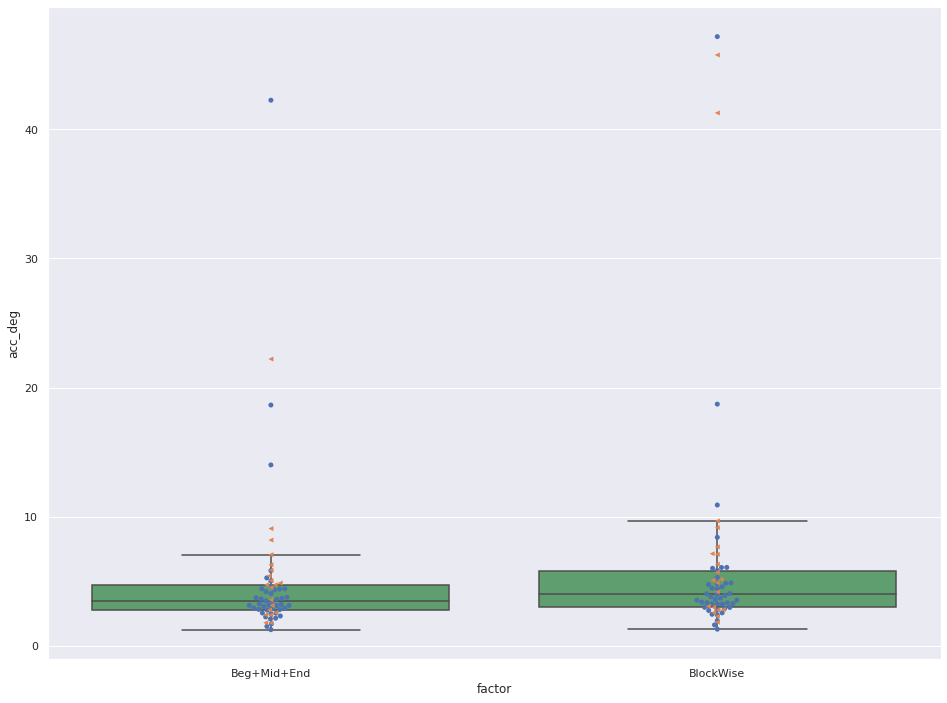

             count        max      mean       min       std
factor                                                     
Beg+Mid+End     63  10.944507  3.502300  1.484853  2.047669
BlockWise       63  12.345385  4.418525  1.413773  2.451935 
 --------------------------------------------------------------------------------------------------------------------------
| Contrast   | A           | B         | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      BF10 |    hedges |
|:-----------|:------------|:----------|:---------|:-------------|---------:|------:|:--------------|------------:|----------:|----------:|
| factor     | Beg+Mid+End | BlockWise | True     | True         | -8.40294 |    61 | two-sided     | 8.93828e-12 | 1.006e+09 | -0.403347 | 



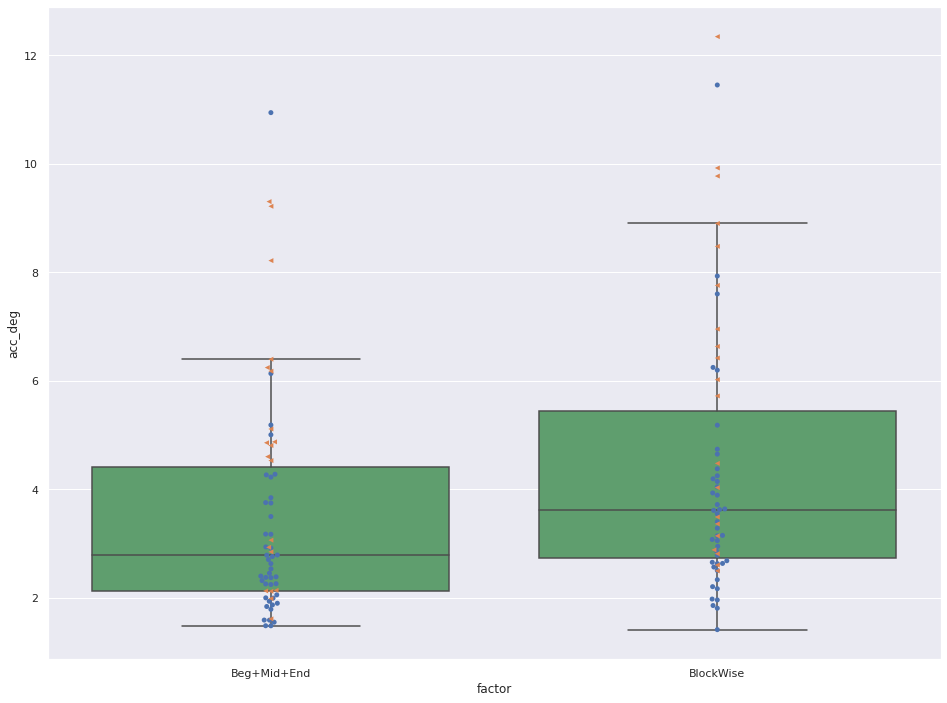

In [37]:
ct2_run_tests(ct2_mpii, in_vis_deg=True)
ct2_run_tests(ct2_eth, in_vis_deg=True)
ct2_run_tests(ct2_faze, in_vis_deg=True)

In [91]:
ct2_comb = pd.merge(ct2_mpii,ct2_eth, on = ["subject", "factor"]).merge(ct2_faze, on = ["subject", "factor"])
ct2_comb = ct2_comb.set_index(["subject","factor"]).stack().reset_index()
ct2_comb.columns = ["subject","factor_sample","factor_model","acc"]
ct2_comb["factor_model"].replace({"acc_x": "mpii", "acc_y":"eth", "acc":"faze"}, inplace = True)
print(AnovaRM(data=ct2_comb, depvar='acc', subject='subject', within=['factor_sample', 'factor_model']).fit())

                          Anova
                           F Value Num DF  Den DF  Pr > F
---------------------------------------------------------
factor_sample              16.1190 1.0000  62.0000 0.0002
factor_model                3.4934 2.0000 124.0000 0.0334
factor_sample:factor_model  1.7068 2.0000 124.0000 0.1857



## Calib Test 3

In [142]:
## Create dfs

# ct3_mpii = consolidate_3(subjects, pred_path.MPII, save = True) 
# ct3_eth = consolidate_3(subjects, pred_path.ETH, save = True)
# ct3_faze = consolidate_3(subjects, pred_path.FAZE, save = True)

## Load dfs

ct3_mpii = pd.read_csv("calib_tests_df/mpii_ct3.csv")
ct3_eth = pd.read_csv("calib_tests_df/eth_ct3.csv")
ct3_faze = pd.read_csv("calib_tests_df/faze_ct3.csv")

ct3_mpii = ct3_mpii[ct3_mpii["subject"].isin(subjects)].reset_index(drop=True)
ct3_eth = ct3_eth[ct3_eth["subject"].isin(subjects)].reset_index(drop=True)
ct3_faze = ct3_faze[ct3_faze["subject"].isin(subjects)].reset_index(drop=True)

In [99]:
len(subjects)

41

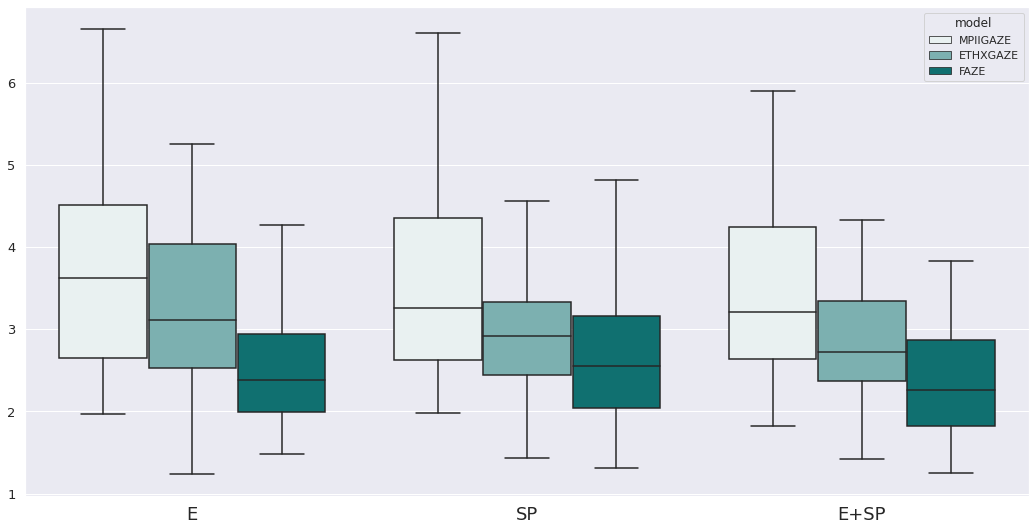

In [98]:
plt.figure(figsize=(18,9))
ct3_mpii = ct3_mpii[ct3_mpii["subject"].isin(subjects)].reset_index(drop=True)
ct3_eth = ct3_eth[ct3_eth["subject"].isin(subjects)].reset_index(drop=True)
ct3_faze = ct3_faze[ct3_faze["subject"].isin(subjects)].reset_index(drop=True)
ct3_mpii["model"] = "MPIIGAZE"
ct3_eth["model"] = "ETHXGAZE"
ct3_faze["model"] = "FAZE"
temp = pd.concat([ct3_mpii, ct3_eth, ct3_faze])
temp["acc_deg"] = temp.acc/54.05
sns.boxplot(x="factor", y="acc_deg", hue="model", data = temp, color="teal", showfliers = False)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 13)
plt.xlabel('')
plt.ylabel('')
plt.savefig("calib3_etra.svg")

In [143]:
mpii = ct3_mpii[["subject","acc"]].groupby("subject").mean()
eth = ct3_eth[["subject","acc"]].groupby("subject").mean()
faze = ct3_faze[["subject","acc"]].groupby("subject").mean()

mpii["model"] = "MPII"; eth["model"] = "ETHXGaze"; faze["model"] = "FAZE" 
avg_models = mpii.append(eth).append(faze).sort_values("subject")
print(pg.pairwise_ttests(dv='acc', within='model', subject='subject', padjust='bonf', data = avg_models).to_markdown())

|    | Contrast   | A        | B    | Paired   | Parametric   |         T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |      BF10 |    hedges |
|---:|:-----------|:---------|:-----|:---------|:-------------|----------:|------:|:--------------|------------:|------------:|:-----------|----------:|----------:|
|  0 | model      | ETHXGaze | FAZE | True     | True         |  1.88094  |    40 | two-sided     | 0.067274    | 0.201822    | bonf       | 0.836     |  0.370516 |
|  1 | model      | ETHXGaze | MPII | True     | True         |  0.684584 |    40 | two-sided     | 0.497554    | 1           | bonf       | 0.21      |  0.135427 |
|  2 | model      | FAZE     | MPII | True     | True         | -8.18634  |    40 | two-sided     | 4.42655e-10 | 1.32797e-09 | bonf       | 2.465e+07 | -0.647739 |


In [145]:
avg_samples = ct3_mpii.append(ct3_eth).append(ct3_faze)

avg_samples = avg_samples.groupby(["subject","factor"]).mean().reset_index()

print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = avg_samples).to_markdown())

|    | Contrast   | A    | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |    BF10 |     hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|---------:|------:|:--------------|------------:|------------:|:-----------|--------:|-----------:|
|  0 | factor     | E    | E+SP | True     | True         |  4.41713 |    40 | two-sided     | 7.42056e-05 | 0.000222617 | bonf       | 317.222 |  0.125386  |
|  1 | factor     | E    | SP   | True     | True         |  1.37136 |    40 | two-sided     | 0.177908    | 0.533725    | bonf       |   0.402 |  0.051099  |
|  2 | factor     | E+SP | SP   | True     | True         | -3.58278 |    40 | two-sided     | 0.000912243 | 0.00273673  | bonf       |  32.892 | -0.0787589 |


In [111]:
def ct3_run_tests(ct3_df, in_vis_deg = False, exclude_low_fps = False, pal = sns.color_palette('deep', 3)):
    ct3_df = ct3_df.copy()
    if in_vis_deg: 
        ct3_df["acc_deg"] = ct3_df.acc/54.05
        target = 'acc_deg'
    else: target = 'acc'
    
    if exclude_low_fps:
        ct3_df = ct3_df[~ct3_df.subject.isin(low_fps_subb)]
    
    print(ct3_df.groupby("factor")[target].agg(['count', 'max', 'mean', 'min', 'std']))
    print(AnovaRM(data=ct3_df, depvar='acc', subject='subject', within=['factor']).fit()) #depvar for ANOVA is acc not acc_deg
    sns.set(rc={'figure.figsize':(16,12)})
    sns.boxplot(x="factor", y=target, data = ct3_df, color=pal[2], showfliers = False)
    sns.swarmplot(x="factor", y=target, data = ct3_df[~ct3_df.subject.isin(low_fps_subb)], color = pal[0])
    if not exclude_low_fps: sns.swarmplot(x="factor", y=target, data = ct3_df[ct3_df.subject.isin(low_fps_subb)], color = pal[1], marker = '<')
    plt.show()

        count        max      mean       min       std
factor                                                
E          63  11.230361  4.303127  1.964759  1.855452
E+SP       63  10.188355  3.950415  1.823404  1.725692
SP         63  10.090683  4.012137  1.986529  1.700441
                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
factor 12.5471 2.0000 124.0000 0.0000



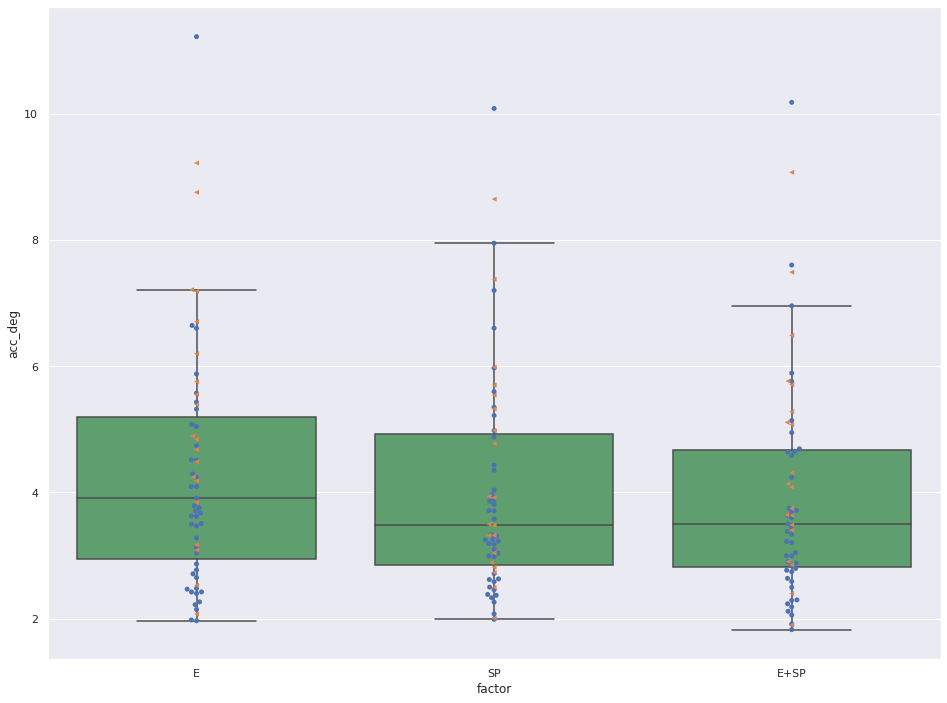

        count        max      mean       min       std
factor                                                
E          63  42.261586  4.988422  1.238458  5.949823
E+SP       63  36.516049  4.304878  1.425624  4.951455
SP         63  33.217346  4.479743  1.437118  5.319008
                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
factor  7.6719 2.0000 124.0000 0.0007



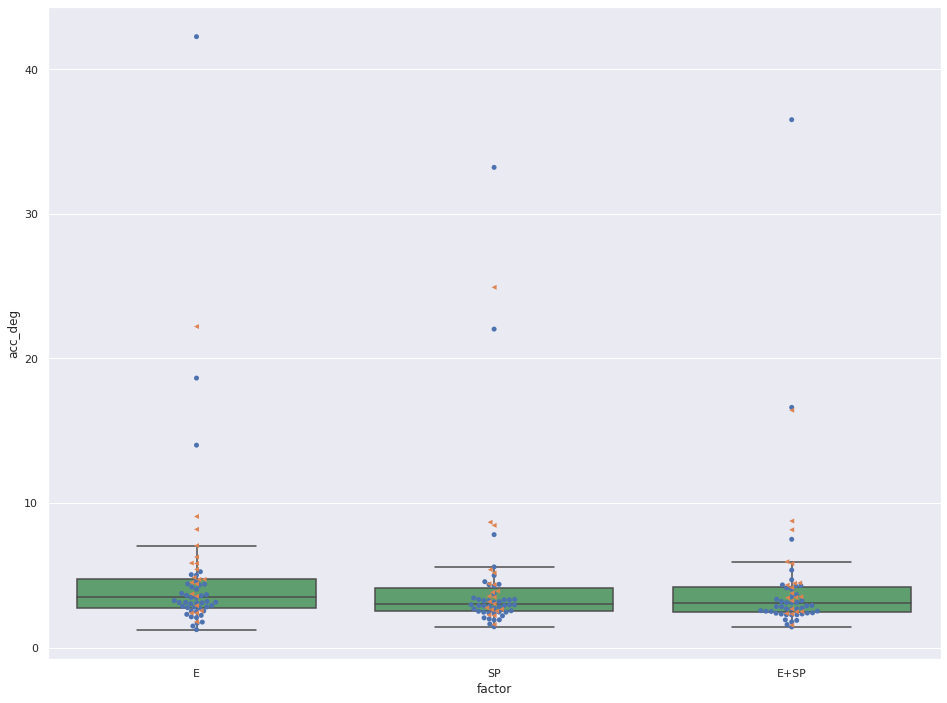

        count        max      mean       min       std
factor                                                
E          63  10.944507  3.502300  1.484853  2.047669
E+SP       63  10.727076  3.127112  1.249091  1.813433
SP         63  10.349921  3.130137  1.309133  1.647920
                Anova
       F Value Num DF  Den DF  Pr > F
-------------------------------------
factor  7.9162 2.0000 124.0000 0.0006



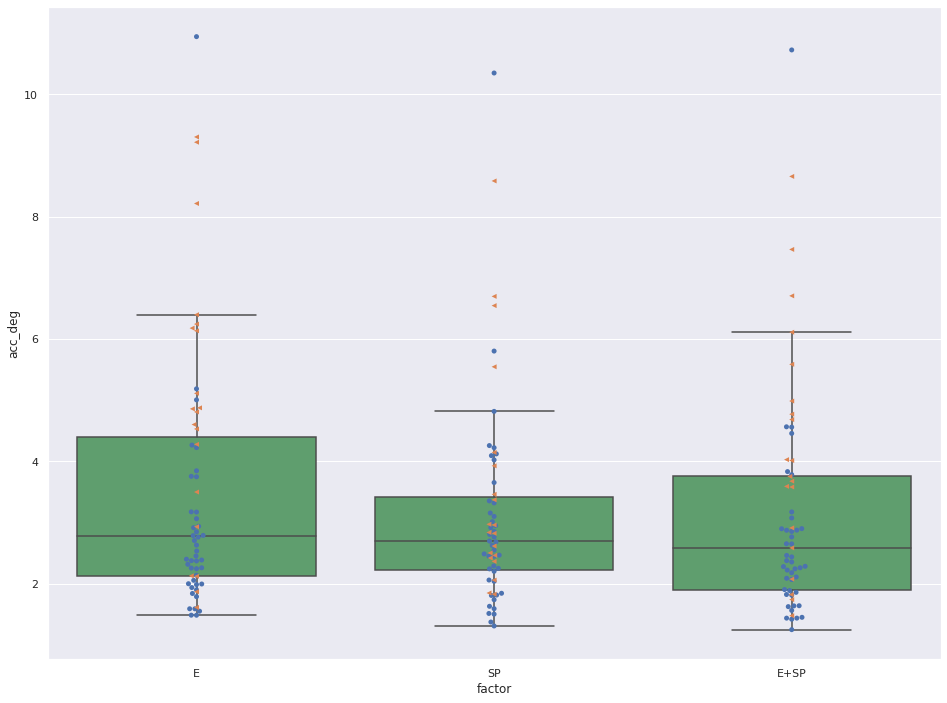

In [112]:
ct3_run_tests(ct3_mpii, in_vis_deg=True)
ct3_run_tests(ct3_eth, in_vis_deg=True)
ct3_run_tests(ct3_faze, in_vis_deg=True)

In [53]:
import pingouin as pg
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct3_mpii).to_markdown())
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct3_eth).to_markdown())
print(pg.pairwise_ttests(dv='acc', within='factor', subject='subject', padjust='bonf', data = ct3_faze).to_markdown())

|    | Contrast   | A    | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |     BF10 |    hedges |
|---:|:-----------|:-----|:-----|:---------|:-------------|---------:|------:|:--------------|------------:|------------:|:-----------|---------:|----------:|
|  0 | factor     | E    | E+SP | True     | True         |  5.22041 |    62 | two-sided     | 2.19877e-06 | 6.59632e-06 | bonf       | 7442.72  |  0.195661 |
|  1 | factor     | E    | SP   | True     | True         |  2.88835 |    62 | two-sided     | 0.00532732  | 0.0159819   | bonf       |    5.951 |  0.16252  |
|  2 | factor     | E+SP | SP   | True     | True         | -1.30048 |    62 | two-sided     | 0.198251    | 0.594752    | bonf       |    0.308 | -0.035811 |
|    | Contrast   | A    | B    | Paired   | Parametric   |        T |   dof | alternative   |       p-unc |      p-corr | p-adjust   |    BF10 |     hedges |
|---:|:-----------|:-----|:-----|:---------|:-

In [154]:
ct3_comb = pd.merge(ct3_mpii,ct3_eth, on = ["subject", "factor"]).merge(ct3_faze, on = ["subject", "factor"])
ct3_comb = ct3_comb.set_index(["subject","factor"]).stack().reset_index()
ct3_comb.columns = ["subject","factor_sample","factor_model","acc"]
ct3_comb["factor_model"].replace({"acc_x": "mpii", "acc_y":"eth", "acc":"faze"}, inplace = True)
ct3_comb
print(AnovaRM(data=ct3_comb, depvar='acc', subject='subject', within=['factor_sample', 'factor_model']).fit())

                          Anova
                           F Value Num DF  Den DF  Pr > F
---------------------------------------------------------
factor_sample               9.0383 2.0000  80.0000 0.0003
factor_model                2.6572 2.0000  80.0000 0.0763
factor_sample:factor_model  1.8832 4.0000 160.0000 0.1159



In [155]:
from pingouin import rm_anova
rm_anova(data=ct3_comb, dv = 'acc', within = ['factor_sample', 'factor_model'], subject='subject', detailed = True, effsize = 'n2')

/home/shreshth.saxena/.conda/envs/temp/lib/python3.9/site-packages/pingouin/distribution.py:459: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn("Epsilon values might be innaccurate in "


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,n2,eps
0,factor_sample,20148.510536,2,80,10074.255268,9.038316,0.000289,0.001468,0.002457,0.704121
1,factor_model,489322.302880,2,80,244661.151440,2.657205,0.076332,0.109795,0.059670,0.515620
2,factor_sample * factor_model,10603.451931,4,160,2650.862983,1.883230,0.115897,0.183943,0.001293,0.136061


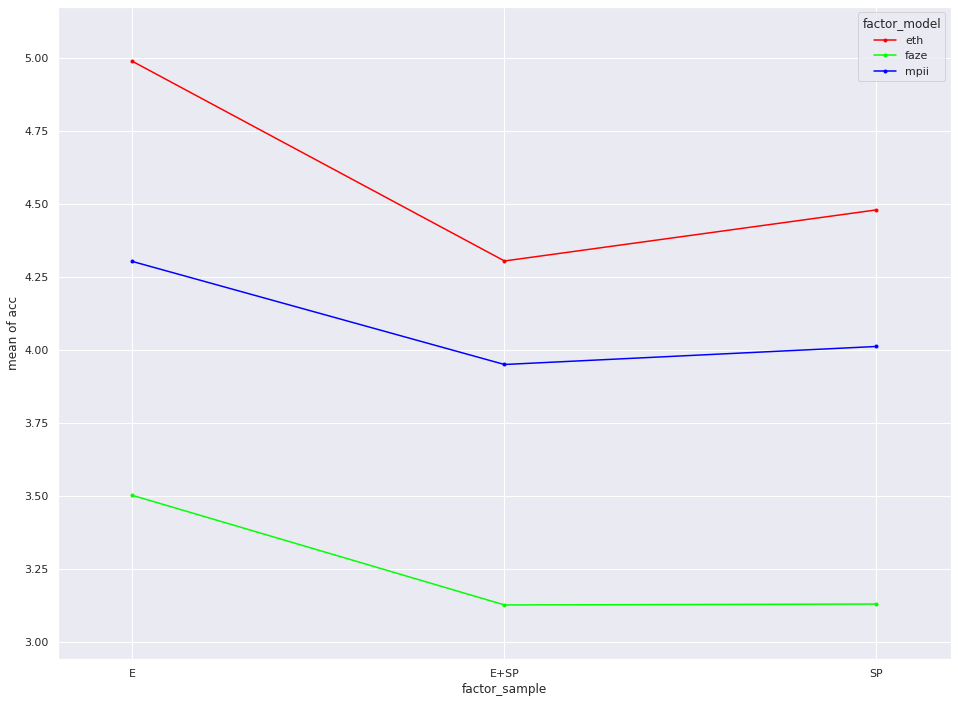

In [55]:
from statsmodels.graphics.factorplots import interaction_plot
# ct1_comb["acc_v"] = ct1_comb['acc']/54.05
interaction_plot(ct3_comb["factor_sample"], ct3_comb["factor_model"], ct3_comb["acc"]/54.05)
plt.show()

### ruf

158.83202961595322


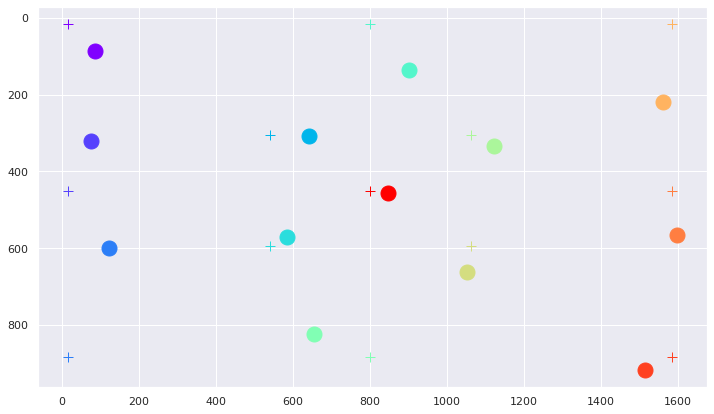

In [358]:
pallete = iter(cm.rainbow(np.linspace(0, 1, 13)))
plt.figure(figsize=(12,7))
fix_analyse = Fixation('s55', show = False)
trial_x, trial_y = fix_analyse.parse_trials(pred_path.FAZE,1, "poly_x_3", "poly_y_3", show = False)
print(get_fix_acc(fix_analyse.gt_points, trial_x, trial_y))
for key in range(1,14):
    c = next(pallete)
    pt = fix_analyse.gt_points[key-1]
    plt.plot(pt[0],pt[1], marker="+", markersize=10, color = c)
    
    X = winsorize(trial_x[key], limits=[0.1,0.1]).mean()
    Y = winsorize(trial_y[key], limits=[0.1,0.1]).mean()
    
#     X = statistics.median(trial_x[key])
#     Y = statistics.median(trial_y[key])
    plt.plot(X,Y, color = c, markersize = 15, marker = "o")
plt.gca().invert_yaxis()
plt.show()

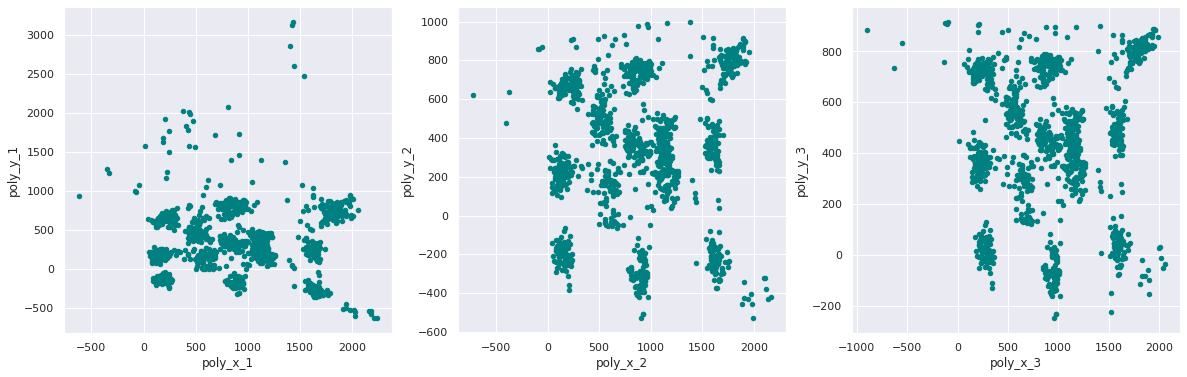

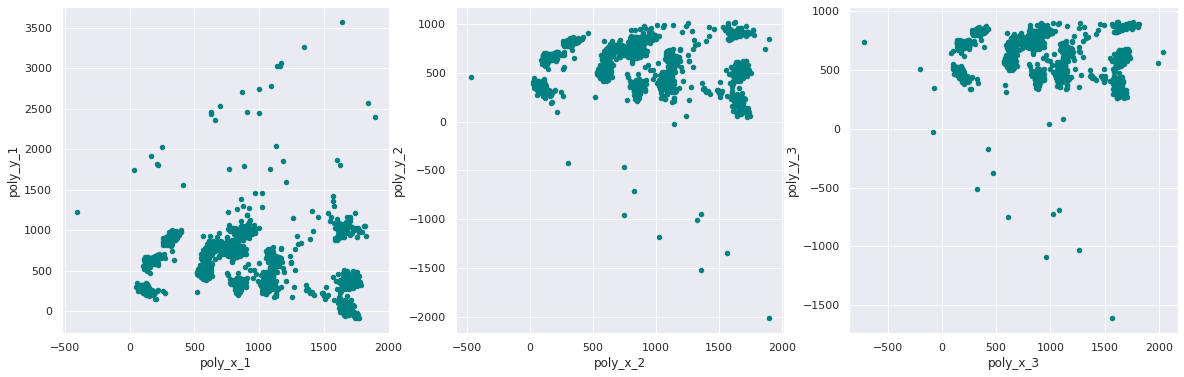

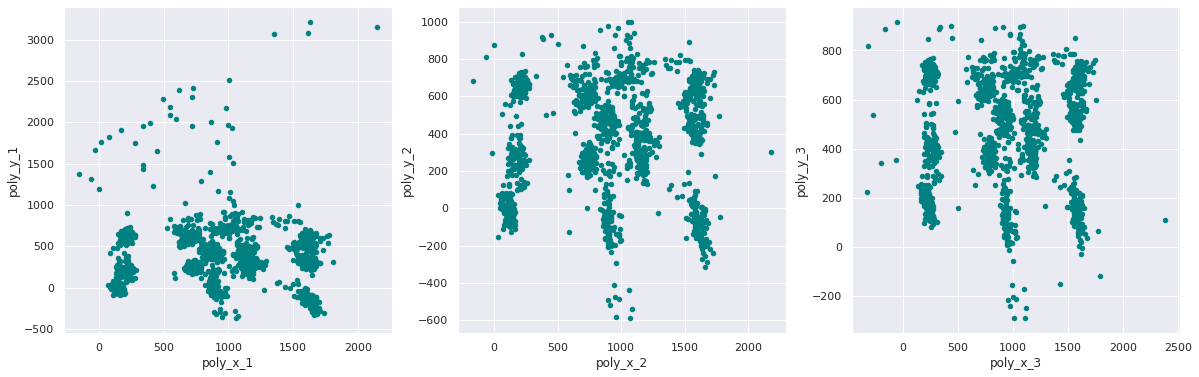

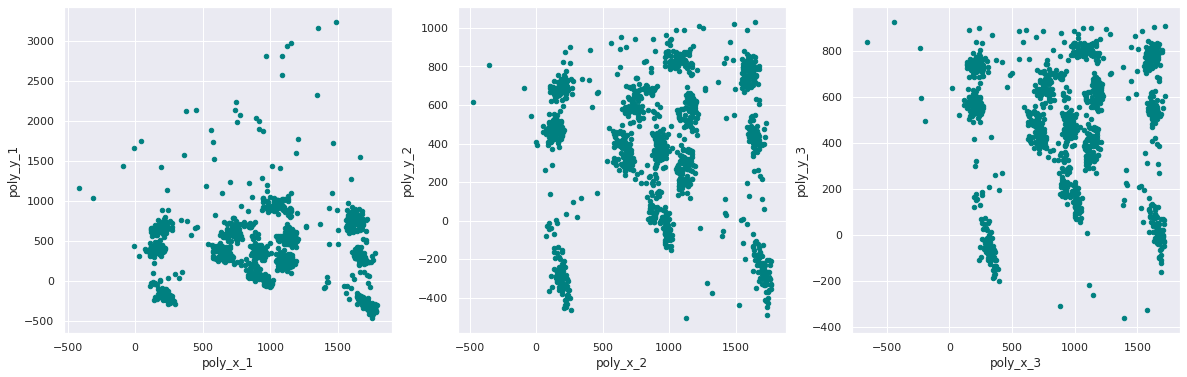

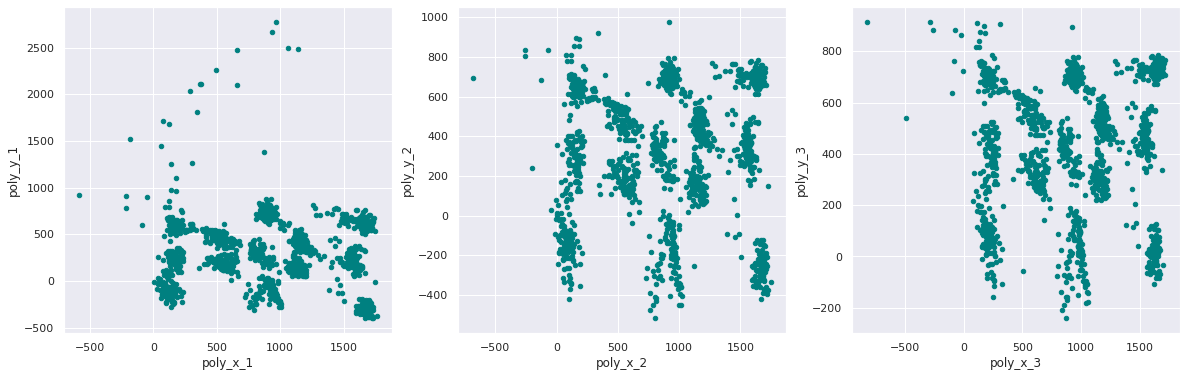

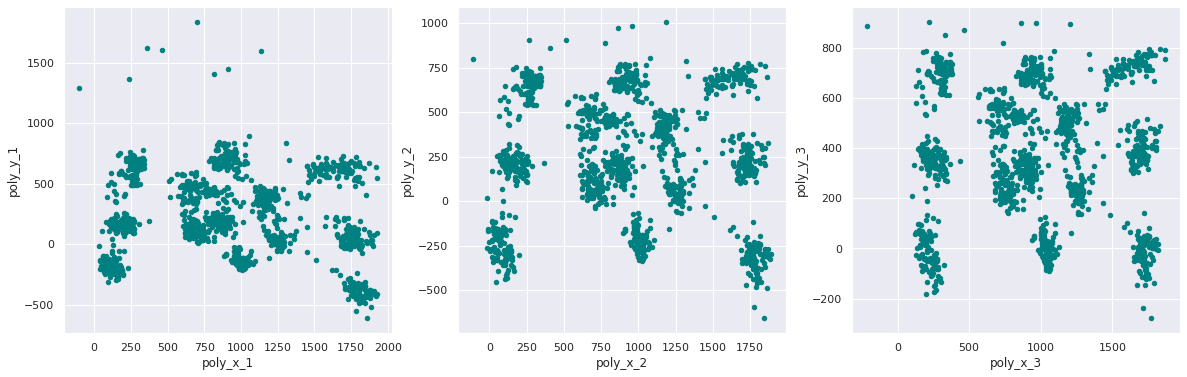

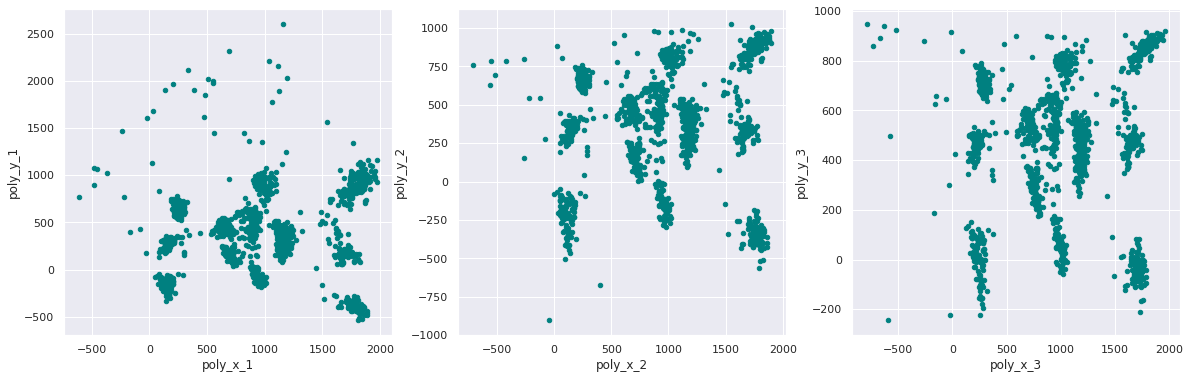

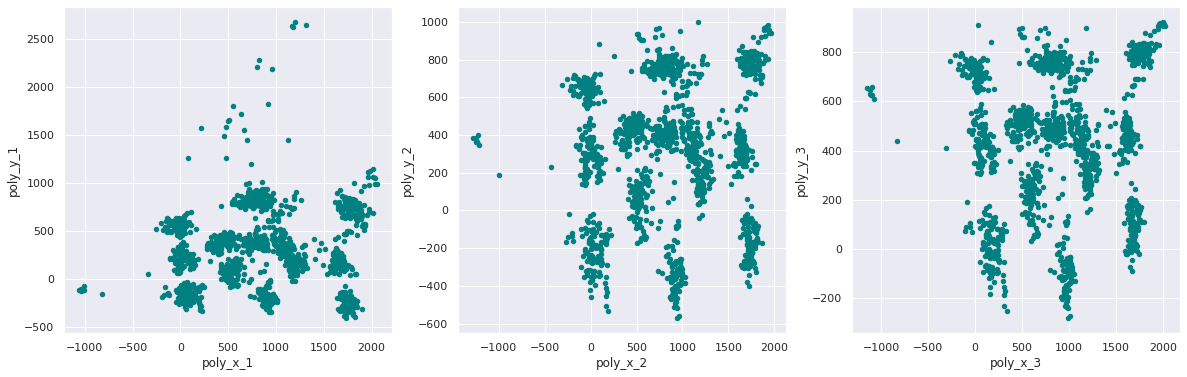

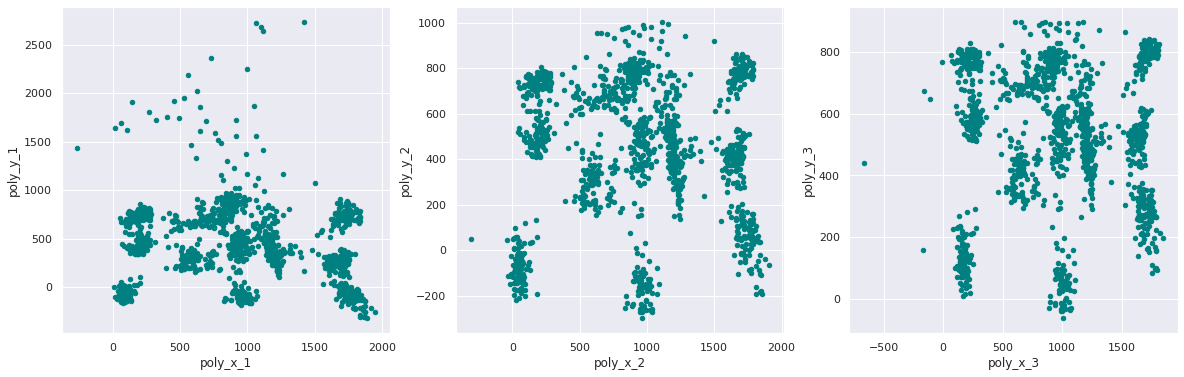

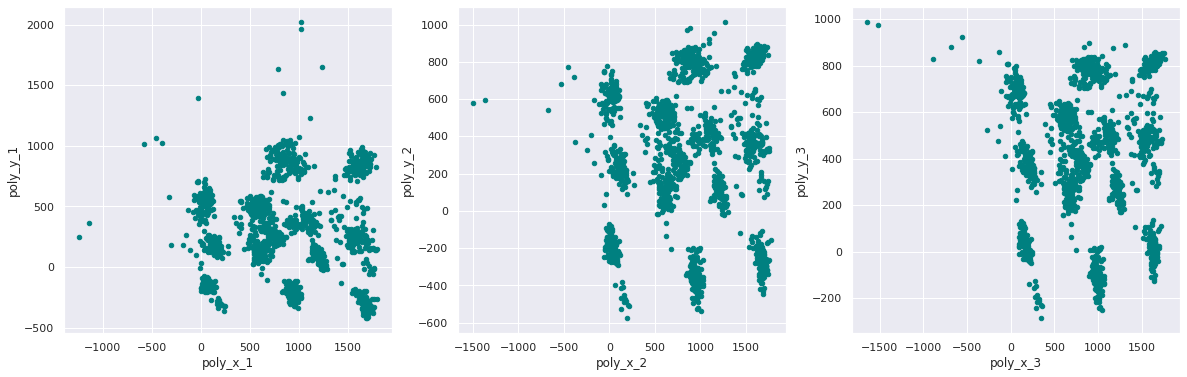

In [345]:
subb = "s17"

for path in glob.glob(pred_path.ETH.value+f'{subb}/calib_test1/outputs/*/*'):
        fig, axs = plt.subplots(1,3, figsize=(20,6))
        df = pd.read_csv(path)
        df.plot(x="poly_x_1", y = "poly_y_1", kind = "scatter", ax=axs[0], color ='teal')
        df.plot(x="poly_x_2", y = "poly_y_2", kind = "scatter", ax=axs[1], color='teal')
        df.plot(x="poly_x_3", y = "poly_y_3", kind = "scatter", ax=axs[2], color='teal')